In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = [14, 10]
rcParams['font.size'] = 22

In [3]:
def load_data(file_name):
    data = np.loadtxt(file_name)
    Ts = data[:, 0]
    Es = data[:, 1]
    Cs = data[:, 2]
    Ms = data[:, 3]
    Xs = data[:, 4]
    Bs = data[:, 5]
    return Ts, Es, Cs, Ms, Xs, Bs

In [4]:
def plot_data(xs, ys, **kwargs):
    
    colors = ['green', 'gold', 'purple', 'blue', 'orange', 'cyan', 'magenta']
    
    if 'xscaling' in kwargs.keys():
        xscaling = kwargs['xscaling']
    else:
        xscaling = None
    
    if 'yscaling' in kwargs.keys():
        yscaling = kwargs['yscaling']
    else:
        yscaling = None
    
    if 'labels' in kwargs.keys():
        labels = kwargs['labels']
    else:
        labels = None
    
    for i, x in enumerate(xs):
        y = ys[i]
        color = colors[i % len(colors)]
        
        if xscaling is not None:
            L = kwargs['Ls'][i]
            x = [xscaling(x_i, L) for x_i in x]
        if yscaling is not None:
            L = kwargs['Ls'][i]
            y = [yscaling(y_i, L) for y_i in y]
        
        if labels is not None:
            label = labels[i]
        else:
            label = None
        
        plt.plot(x, y, linestyle='None', marker='o', color=color, markersize=8, label=label)
        
        
    if labels is not None:
        plt.legend()
    
    if 'xlabelpad' in kwargs.keys():
        xlabelpad = kwargs['xlabelpad']
    else:
        xlabelpad = 30
        
    if 'ylabelpad' in kwargs.keys():
        ylabelpad = kwargs['ylabelpad']
    else:
        ylabelpad = 30
    
    if 'xlabel' in kwargs.keys():
        plt.xlabel(kwargs['xlabel'])
    
    if 'ylabel' in kwargs.keys():
        plt.ylabel(kwargs['ylabel'], rotation=0, labelpad=ylabelpad)
    
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])

In [5]:
Tss, Mss, Xss, Bss, Css = [], [], [], [], []
Ts, Es, Cs, Ms, Xs, Bs = load_data('crit_L_30_1.5_3.5.txt')
Tss.append(Ts)
Mss.append(Ms)
Xss.append(Xs)
Bss.append(Bs)
Css.append(Cs)
Ts, Es, Cs, Ms, Xs, Bs = load_data('crit_L_60_1.5_3.5.txt')
Tss.append(Ts)
Mss.append(Ms)
Xss.append(Xs)
Bss.append(Bs)
Css.append(Cs)
Ts, Es, Cs, Ms, Xs, Bs = load_data('crit_L_120_1.5_3.5.txt')
Tss.append(Ts)
Mss.append(Ms)
Xss.append(Xs)
Bss.append(Bs)
Css.append(Cs)
Ts, Es, Cs, Ms, Xs, Bs = load_data('crit_L_240_1.5_3.5.txt')
Tss.append(Ts)
Mss.append(Ms)
Xss.append(Xs)
Bss.append(Bs)
Css.append(Cs)
Ts, Es, Cs, Ms, Xs, Bs = load_data('crit_L_360_1.5_3.5.txt')
Tss.append(Ts)
Mss.append(Ms)
Xss.append(Xs)
Bss.append(Bs)
Css.append(Cs)

In [6]:
Ls = [30, 60, 120, 240, 360]
labels = ["L = {}".format(Ls[0])]
for L in Ls[1:]:
    labels.append("   = {}".format(L))
# Critical exponents
nu, beta, gamma = 1, 1/8, 7/4
J = 1
T_c = 2 * J / (np.log(1 + np.sqrt(2)))

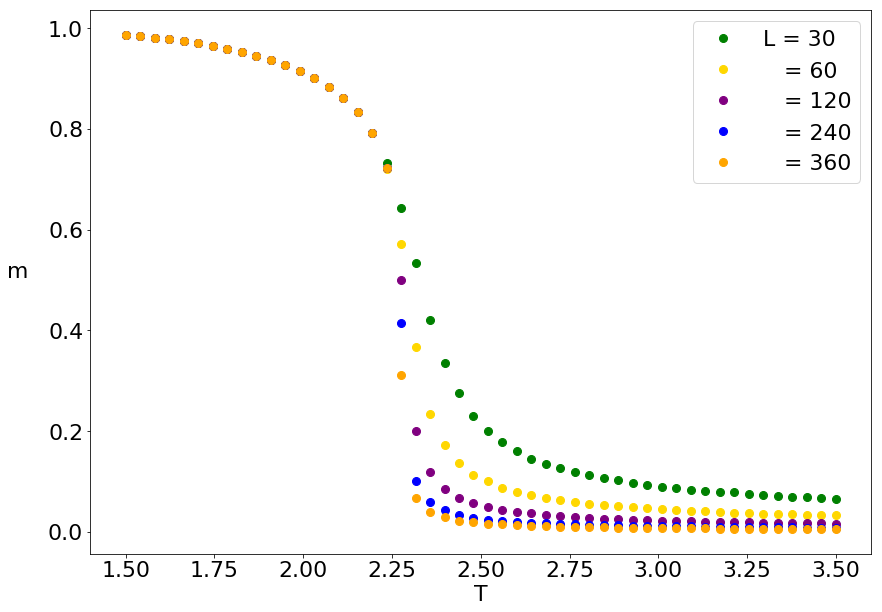

In [7]:
plot_data(Tss, Mss, xlabel="T", ylabel="m", labels=labels)

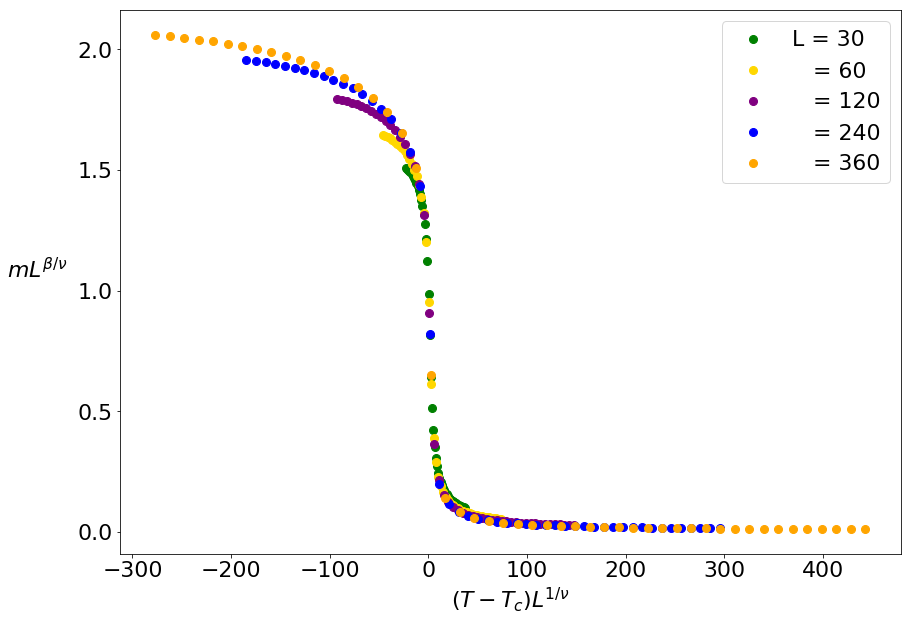

In [8]:
xscaling = lambda T, L : (T - T_c) * L**(1/nu)
yscaling = lambda m, L : m * L**(beta / nu)

plot_data(Tss, Mss, Ls=Ls, xscaling=xscaling, yscaling=yscaling, xlabel=r"$(T - T_c)L^{1/\nu}$", ylabel=r"$m L^{\beta / \nu}$", ylabelpad=40, labels=labels)

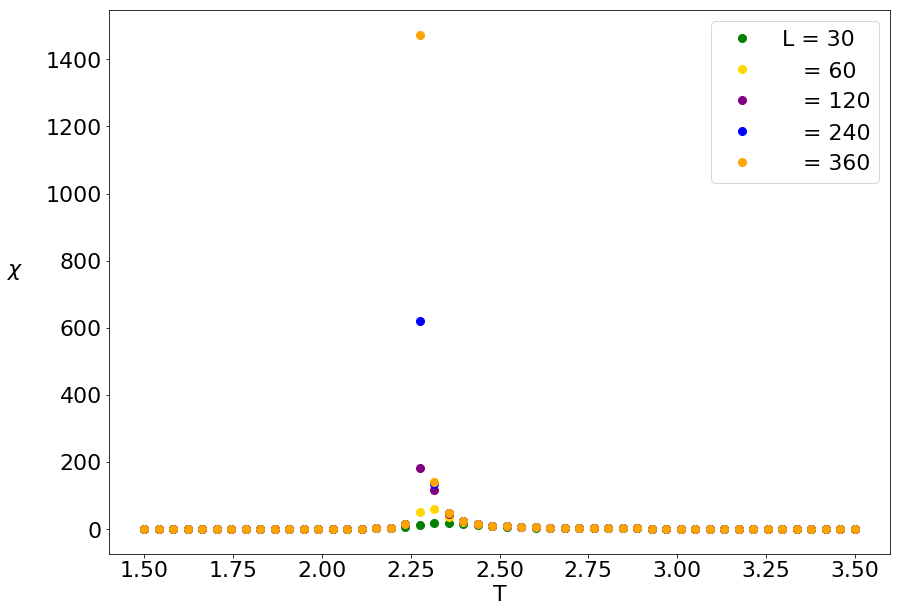

In [9]:
plot_data(Tss, Xss, xlabel="T", ylabel=r"$\chi$", labels=labels)

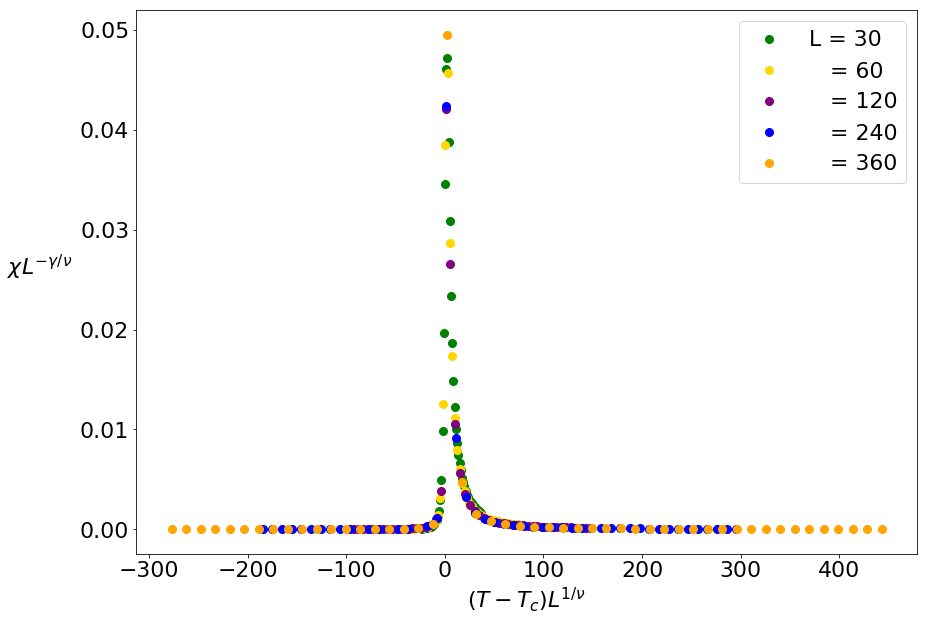

In [10]:
xscaling = lambda T, L : (T - T_c)*(L**(1/nu))
yscaling = lambda x, L : x * L**(-gamma / nu)
plot_data(Tss, Xss, Ls=Ls, xscaling=xscaling, yscaling=yscaling, xlabel=r"$(T - T_c) L^{1/\nu}$", ylabel=r"$\chi L^{-\gamma / \nu}$", ylabelpad=40, labels=labels)

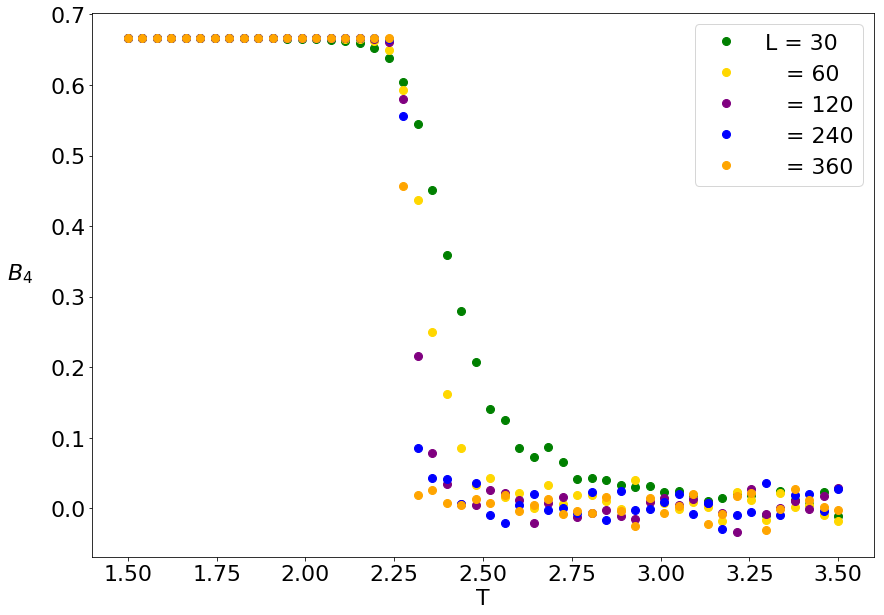

In [11]:
plot_data(Tss, Bss, xlabel="T", ylabel=r"$B_4$", labels=labels)

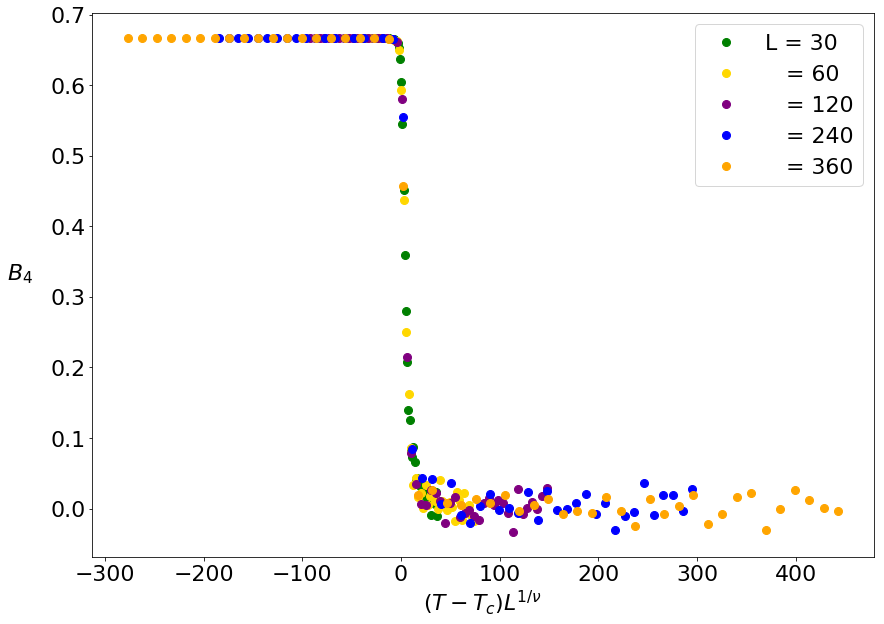

In [12]:
xscaling = lambda T, L : (T - T_c)*L**(1/nu)
plot_data(Tss, Bss, Ls=Ls, xscaling=xscaling, xlabel=r"$(T - T_c) L^{1/\nu}$", ylabel=r"$B_4$", labels=labels)

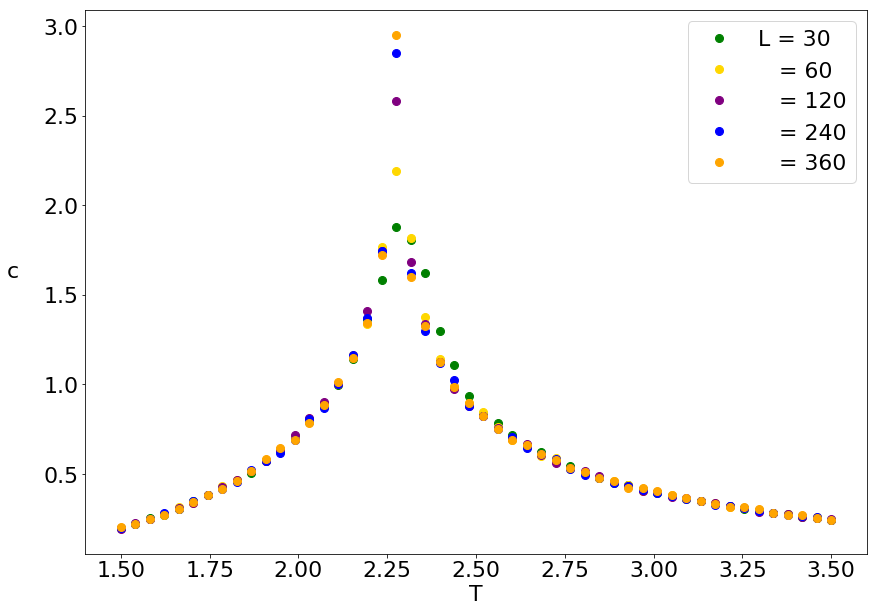

In [13]:
plot_data(Tss, Css, xlabel="T", ylabel="c", labels=labels)

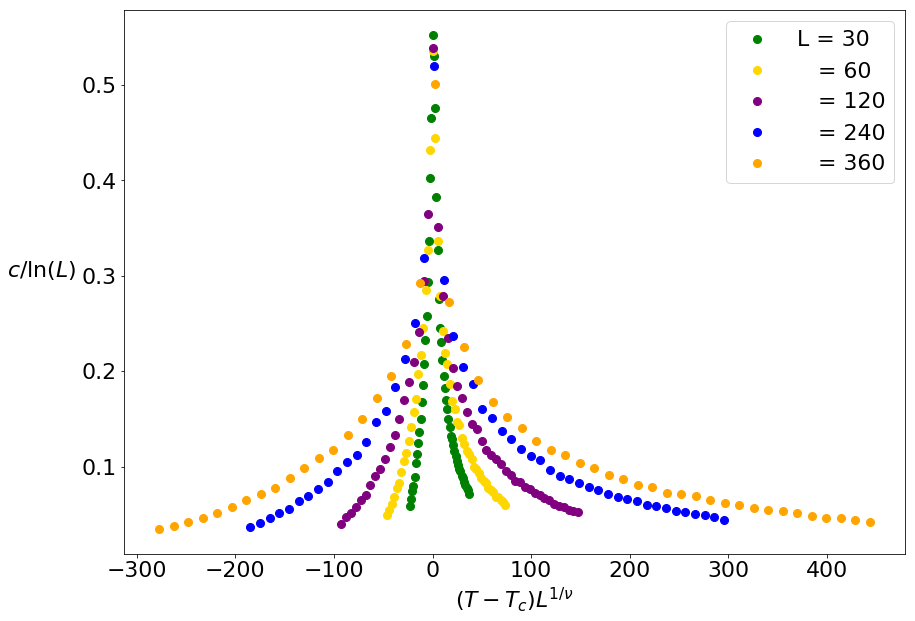

In [14]:
xscaling = lambda T, L : (T - T_c) * L**(1/nu)
yscaling = lambda c, L : c / np.log(L)
plot_data(Tss, Css, Ls=Ls, xscaling=xscaling, yscaling=yscaling, xlabel=r"$(T - T_c) L^{1/\nu}$", ylabel=r"$c/\ln(L)$", ylabelpad=40, labels=labels)